In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
df = pd.read_csv("model3_dataset.csv")

In [22]:
df

,recipe_name,details,ingredients,instructions,image_url,recipe_url,category
0,Sunflower Seed & Honey Wheat Bread,['Total Time Prep: 40 min. + rising Bake: 35 m...,['2 packages (1/4 ounce each) active dry yeast...,"['In a large bowl, dissolve yeast in warm wate...",https://www.tasteofhome.com/wp-content/uploads...,https://www.tasteofhome.com/recipes/sunflower-...,Bread
1,Pumpkin Bread,['Total Time Prep: 15 min. Bake: 65 min. + coo...,"['1-2/3 cups all-purpose flour', '1-1/2 cups s...",['Preheat oven to 350Â°. Combine first 8 ingre...,https://www.tasteofhome.com/wp-content/uploads...,https://www.tasteofhome.com/recipes/pumpkin-br...,Bread
2,Basic Homemade Bread,['Total Time Prep: 20 min. + rising Bake: 30 m...,"['1 package (1/4 ounce) active dry yeast', '3 ...","['In a large bowl, dissolve yeast and 1/2 teas...",https://www.tasteofhome.com/wp-content/uploads...,https://www.tasteofhome.com/recipes/basic-home...,Bread
3,Best Ever Banana Bread,['Total Time Prep: 15 min. Bake: 1-1/4 hours +...,"['1-3/4 cups all-purpose flour', '1-1/2 cups s...","['Preheat oven to 350Â°. In a large bowl, stir...",https://www.tasteofhome.com/wp-content/uploads...,https://www.tasteofhome.com/recipes/best-ever-...,Bread
4,Buttery Cornbread,['Total Time Prep: 15 min. Bake: 25 min. Makes...,"['2/3 cup butter, softened', '1 cup sugar', '3...","['Preheat oven to 400Â°. In a large bowl, crea...",https://www.tasteofhome.com/wp-content/uploads...,https://www.tasteofhome.com/recipes/buttery-co...,Bread
...,...,...,...,...,...,...,...
695,Yellow Cake Made from Scratch,['Recipe Summary test Servings: 24 Yie...,"['2 cups all-purpose flour', '1\u2009Â½ cups w...",['Step 1 Preheat oven to 350 degrees F (175 ...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,https://www.allrecipes.com/recipe/7986/yellow-...,Cakes
696,Russian Honey Cake,['Recipe Summary test prep: 45 mins co...,"['Â¾ cup wildflower honey', '3 tablespoons col...",['Step 1 Pour honey into a deep saucepan ove...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,https://www.allrecipes.com/recipe/277220/russi...,Cakes
697,Eclair Cake,['Recipe Summary test prep: 25 mins ad...,['2 (3.5 ounce) packages instant vanilla puddi...,"['Step 1 Stir pudding mix, whipped topping, ...",https://imagesvc.meredithcorp.io/v3/mm/image?u...,https://www.allrecipes.com/recipe/7304/eclair-...,Cakes
698,Almond Ricotta Cake,['Recipe Summary test prep: 20 mins co...,"['Â½ cup unsalted butter, at room temperature'...",['Step 1 Preheat the oven to 325 degrees F (...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,https://www.allrecipes.com/recipe/283483/almon...,Cakes


In [23]:
df.drop_duplicates(keep='first', inplace=True)

In [24]:
df.shape

(612, 7)

In [25]:
df_new = df[['ingredients','category']]

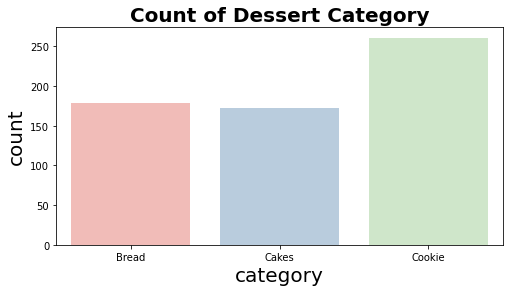

In [26]:
#Data Visualization
plt.figure(figsize=(8, 4))
plt.title("Count of Dessert Category",size='20',weight='bold')
plt.xlabel("",size='20')
plt.ylabel("",size='20')
sns.countplot(df_new.category,palette='Pastel1');

In [27]:
df_new['ingredients'][0]

"['2 packages (1/4 ounce each) active dry yeast', '3-1/4 cups warm water (110Â° to 115Â°)', '1/4 cup bread flour', '1/3 cup canola oil', '1/3 cup honey', '3 teaspoons salt', '6-1/2 to 7-1/2 cups whole wheat flour', '1/2 cup sunflower kernels', '3 tablespoons butter, melted']"

In [28]:
import re
def Clean1(txt):
    txt = txt.replace("optional","")
    txt = re.sub(r"\\u2009",'',txt)
    txt = txt.replace("\\xa0", '')
    txt = txt.replace("\\n", ',')
    txt = txt.replace("\'", "")
    txt = txt.replace("*",'')
    txt = txt.replace(":",',')
    txt = txt.replace(",,",',')
    txt = txt.replace("Streusel,",'')
    return txt

In [29]:
df_new['newing'] = df_new['ingredients'].apply(Clean1)

C:\Users\Neethu\AppData\Local\Temp/ipykernel_8712/671309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['newing'] = df_new['ingredients'].apply(Clean1)


In [37]:
df_new.drop(columns = ['ingredients'],inplace = True)

C:\Users\Neethu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
df_new.to_csv("data.csv")